In [9]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df_mouse_data = pd.read_csv("data/mouse_data.txt", sep=",")
grouped_mouse_data = df_mouse_data.groupby("trialnumber").agg({
    "blocknumber": "first",
    "timedifference": list,  
    "xpos": list,            
    "ypos": list             
}).reset_index()

# auf 0,0 normalisieren jeden trial
def normalize_positions(row): 
    x_positions = row["xpos"]
    y_positions = row["ypos"]
    
    x_start, y_start = x_positions[0], y_positions[0]
    
    row["xpos"] = [x - x_start for x in x_positions]
    row["ypos"] = [y - y_start for y in y_positions]
    return row

grouped_mouse_data = grouped_mouse_data.apply(normalize_positions, axis=1)
# Interpolation auf 100 Zeiteinheiten
def interpolate_positions(row):
    original_length = len(row["xpos"])
    original_time = np.linspace(0, 1, original_length)  # Ursprünglicher Zeitvektor
    new_time = np.linspace(0, 1, 100)  # Ziel-Zeitvektor mit 100 Zeiteinheiten
    
    # Interpolation der x- und y-Positionen
    row["xpos"] = np.interp(new_time, original_time, row["xpos"])
    row["ypos"] = np.interp(new_time, original_time, row["ypos"])
    return row

grouped_mouse_data = grouped_mouse_data.apply(interpolate_positions, axis=1)
grouped_mouse_data

,trialnumber,blocknumber,timedifference,xpos,ypos
0,1,1,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 364, ...","[0.0, -0.686868686868687, -1.373737373737374, ...","[0.0, -7.7272727272727275, -15.454545454545455..."
1,2,1,"[10, 10, 10, 10, 10, 10, 11, 11, 11, 387, 11, ...","[0.0, -4.525252525252526, -9.050505050505052, ...","[0.0, -14.141414141414142, -28.282828282828284..."
2,3,1,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...","[0.0, -2.666666666666667, -5.333333333333334, ...","[0.0, -12.606060606060607, -25.212121212121215..."
3,4,1,"[10, 10, 10, 10, 10, 10, 10, 10, 12, 11, 11, 1...","[0.0, -1.1111111111111112, -2.2222222222222223...","[0.0, -7.555555555555556, -15.111111111111112,..."
4,5,1,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 14, 1...","[0.0, -1.696969696969697, -3.393939393939394, ...","[0.0, -23.333333333333336, -46.66666666666667,..."
...,...,...,...,...,...
278,279,1,"[10, 10, 10, 10, 10, 10, 10, 10, 10]","[0.0, 5.171717171717172, 10.343434343434344, 1...","[0.0, -5.01010101010101, -10.02020202020202, -..."
279,280,1,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]","[0.0, 7.363636363636364, 14.727272727272728, 2...","[0.0, -4.7272727272727275, -9.454545454545455,..."
280,281,1,"[10, 10, 10, 10, 10, 10, 10]","[0.0, 4.0606060606060606, 8.121212121212121, 1...","[0.0, -4.242424242424243, -8.484848484848486, ..."
281,282,1,"[10, 10, 10, 10, 10, 10]","[0.0, 3.383838383838384, 6.767676767676768, 10...","[0.0, -2.676767676767677, -5.353535353535354, ..."


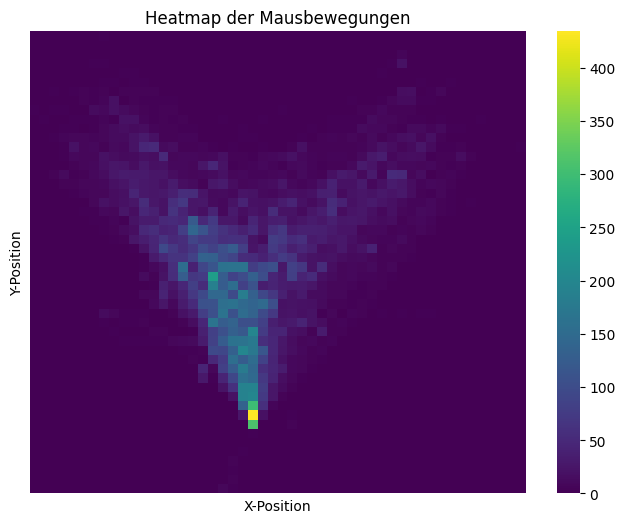

In [11]:
all_xpos = [x for trial in grouped_mouse_data["xpos"] for x in trial]
all_ypos = [y for trial in grouped_mouse_data["ypos"] for y in trial]

# 2D-Histogramm erstellen (Heatmap-Daten)
heatmap_data, x_edges, y_edges = np.histogram2d(
    all_xpos, all_ypos, bins=50  # 50x50 Raster
)

# Heatmap darstellen
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data.T,  # Transponieren, da np.histogram2d die Achsen vertauscht
    cmap="viridis",  # Farbpalette (z. B. 'viridis', 'plasma', 'coolwarm')
    xticklabels=False, yticklabels=False  # Achsenbeschriftung entfernen
)
plt.title("Heatmap der Mausbewegungen")
plt.xlabel("X-Position")
plt.ylabel("Y-Position")
plt.show()

In [12]:
df_trial_data = pd.read_csv("data/trial_data.txt", sep=",")
df_trial_data

,trialnumber,blocknumber,success,reactiontime,currentcongruency,currentdirection,currentlocation,previouscongruency,previousdirection,previouslocation
0,1,1,1,1307,0,1,1,0,1,1
1,2,1,1,1747,1,0,0,0,1,1
2,3,1,1,1473,1,1,1,1,0,0
3,4,1,1,1350,0,1,1,1,1,1
4,5,1,1,2279,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
291,291,1,0,0,0,0,1,0,0,0
292,292,1,0,0,1,1,1,0,0,1
293,293,1,0,0,0,1,0,1,1,1
294,294,1,0,0,0,1,0,0,1,0


In [13]:
merged_df = pd.merge(grouped_mouse_data, df_trial_data, on="trialnumber", how="inner")
merged_df

,trialnumber,blocknumber_x,timedifference,xpos,ypos,blocknumber_y,success,reactiontime,currentcongruency,currentdirection,currentlocation,previouscongruency,previousdirection,previouslocation
0,1,1,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 364, ...","[0.0, -0.686868686868687, -1.373737373737374, ...","[0.0, -7.7272727272727275, -15.454545454545455...",1,1,1307,0,1,1,0,1,1
1,2,1,"[10, 10, 10, 10, 10, 10, 11, 11, 11, 387, 11, ...","[0.0, -4.525252525252526, -9.050505050505052, ...","[0.0, -14.141414141414142, -28.282828282828284...",1,1,1747,1,0,0,0,1,1
2,3,1,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...","[0.0, -2.666666666666667, -5.333333333333334, ...","[0.0, -12.606060606060607, -25.212121212121215...",1,1,1473,1,1,1,1,0,0
3,4,1,"[10, 10, 10, 10, 10, 10, 10, 10, 12, 11, 11, 1...","[0.0, -1.1111111111111112, -2.2222222222222223...","[0.0, -7.555555555555556, -15.111111111111112,...",1,1,1350,0,1,1,1,1,1
4,5,1,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 14, 1...","[0.0, -1.696969696969697, -3.393939393939394, ...","[0.0, -23.333333333333336, -46.66666666666667,...",1,1,2279,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,279,1,"[10, 10, 10, 10, 10, 10, 10, 10, 10]","[0.0, 5.171717171717172, 10.343434343434344, 1...","[0.0, -5.01010101010101, -10.02020202020202, -...",1,0,495,0,0,1,0,0,1
280,280,1,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]","[0.0, 7.363636363636364, 14.727272727272728, 2...","[0.0, -4.7272727272727275, -9.454545454545455,...",1,1,578,1,1,1,0,0,1
281,281,1,"[10, 10, 10, 10, 10, 10, 10]","[0.0, 4.0606060606060606, 8.121212121212121, 1...","[0.0, -4.242424242424243, -8.484848484848486, ...",1,1,395,1,1,0,1,1,1
282,282,1,"[10, 10, 10, 10, 10, 10]","[0.0, 3.383838383838384, 6.767676767676768, 10...","[0.0, -2.676767676767677, -5.353535353535354, ...",1,0,351,0,0,1,1,1,0


In [14]:
# Fails entfernen
merged_df["remove"] = merged_df["success"] == 0
merged_df["remove"] = merged_df["remove"] | merged_df["remove"].shift(1, fill_value=0)
filtered_df = merged_df[~merged_df["remove"]].drop(columns=["remove"])
filtered_df

,trialnumber,blocknumber_x,timedifference,xpos,ypos,blocknumber_y,success,reactiontime,currentcongruency,currentdirection,currentlocation,previouscongruency,previousdirection,previouslocation
0,1,1,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 364, ...","[0.0, -0.686868686868687, -1.373737373737374, ...","[0.0, -7.7272727272727275, -15.454545454545455...",1,1,1307,0,1,1,0,1,1
1,2,1,"[10, 10, 10, 10, 10, 10, 11, 11, 11, 387, 11, ...","[0.0, -4.525252525252526, -9.050505050505052, ...","[0.0, -14.141414141414142, -28.282828282828284...",1,1,1747,1,0,0,0,1,1
2,3,1,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...","[0.0, -2.666666666666667, -5.333333333333334, ...","[0.0, -12.606060606060607, -25.212121212121215...",1,1,1473,1,1,1,1,0,0
3,4,1,"[10, 10, 10, 10, 10, 10, 10, 10, 12, 11, 11, 1...","[0.0, -1.1111111111111112, -2.2222222222222223...","[0.0, -7.555555555555556, -15.111111111111112,...",1,1,1350,0,1,1,1,1,1
4,5,1,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 14, 1...","[0.0, -1.696969696969697, -3.393939393939394, ...","[0.0, -23.333333333333336, -46.66666666666667,...",1,1,2279,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,262,1,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 15, 1...","[0.0, -2.666666666666667, -5.333333333333334, ...","[0.0, -12.84848484848485, -25.6969696969697, -...",1,1,1236,0,1,0,0,0,0
263,263,1,"[10, 10, 10, 10, 10, 10, 12, 10, 10, 11, 11, 1...","[0.0, -1.8383838383838385, -3.676767676767677,...","[0.0, -8.404040404040405, -16.80808080808081, ...",1,1,1246,1,0,1,0,1,0
264,264,1,"[10, 10, 10, 10, 10, 10, 11, 10, 10, 10, 10, 1...","[0.0, -4.414141414141414, -8.828282828282829, ...","[0.0, -10.454545454545455, -20.90909090909091,...",1,1,1140,0,0,0,1,0,1
272,272,1,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...","[0.0, -4.222222222222222, -8.444444444444445, ...","[0.0, -14.96969696969697, -29.93939393939394, ...",1,1,1956,1,0,0,1,1,1


In [20]:
# Standartabweichung > +-4 entfernen
mean_rt = filtered_df["reactiontime"].mean()
std_rt = filtered_df["reactiontime"].std()

filtered_df["outlier"] = (filtered_df["reactiontime"] < mean_rt - 4 * std_rt) | (filtered_df["reactiontime"] > mean_rt + 4 * std_rt)

filtered_df_new = filtered_df[~filtered_df["outlier"]].drop(columns=["outlier"])
filtered_df_new

,trialnumber,blocknumber_x,timedifference,xpos,ypos,blocknumber_y,success,reactiontime,currentcongruency,currentdirection,currentlocation,previouscongruency,previousdirection,previouslocation
0,1,1,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 364, ...","[0.0, -0.686868686868687, -1.373737373737374, ...","[0.0, -7.7272727272727275, -15.454545454545455...",1,1,1307,0,1,1,0,1,1
1,2,1,"[10, 10, 10, 10, 10, 10, 11, 11, 11, 387, 11, ...","[0.0, -4.525252525252526, -9.050505050505052, ...","[0.0, -14.141414141414142, -28.282828282828284...",1,1,1747,1,0,0,0,1,1
2,3,1,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...","[0.0, -2.666666666666667, -5.333333333333334, ...","[0.0, -12.606060606060607, -25.212121212121215...",1,1,1473,1,1,1,1,0,0
3,4,1,"[10, 10, 10, 10, 10, 10, 10, 10, 12, 11, 11, 1...","[0.0, -1.1111111111111112, -2.2222222222222223...","[0.0, -7.555555555555556, -15.111111111111112,...",1,1,1350,0,1,1,1,1,1
4,5,1,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 14, 1...","[0.0, -1.696969696969697, -3.393939393939394, ...","[0.0, -23.333333333333336, -46.66666666666667,...",1,1,2279,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,262,1,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 15, 1...","[0.0, -2.666666666666667, -5.333333333333334, ...","[0.0, -12.84848484848485, -25.6969696969697, -...",1,1,1236,0,1,0,0,0,0
263,263,1,"[10, 10, 10, 10, 10, 10, 12, 10, 10, 11, 11, 1...","[0.0, -1.8383838383838385, -3.676767676767677,...","[0.0, -8.404040404040405, -16.80808080808081, ...",1,1,1246,1,0,1,0,1,0
264,264,1,"[10, 10, 10, 10, 10, 10, 11, 10, 10, 10, 10, 1...","[0.0, -4.414141414141414, -8.828282828282829, ...","[0.0, -10.454545454545455, -20.90909090909091,...",1,1,1140,0,0,0,1,0,1
272,272,1,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...","[0.0, -4.222222222222222, -8.444444444444445, ...","[0.0, -14.96969696969697, -29.93939393939394, ...",1,1,1956,1,0,0,1,1,1


In [21]:
# daten alle auf eine seite spiegeln
def mirror_trajectories(row):
    if row["currentdirection"] == 1:
        row["xpos"] = [-x for x in row["xpos"]]
    return row
mirrored_df =filtered_df_new.apply(mirror_trajectories, axis=1)

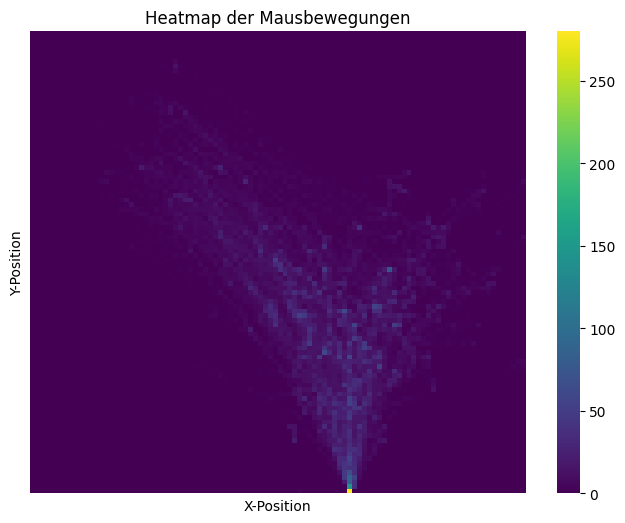

In [23]:
all_xpos = [x for trial in mirrored_df["xpos"] for x in trial]
all_ypos = [y for trial in mirrored_df["ypos"] for y in trial]

# 2D-Histogramm erstellen (Heatmap-Daten)
heatmap_data, x_edges, y_edges = np.histogram2d(
    all_xpos, all_ypos, bins=100  # 50x50 Raster
)

# Heatmap darstellen
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data.T,  # Transponieren, da np.histogram2d die Achsen vertauscht
    cmap="viridis",  # Farbpalette (z. B. 'viridis', 'plasma', 'coolwarm')
    xticklabels=False, yticklabels=False  # Achsenbeschriftung entfernen
)
plt.title("Heatmap der Mausbewegungen")
plt.xlabel("X-Position")
plt.ylabel("Y-Position")
plt.show()

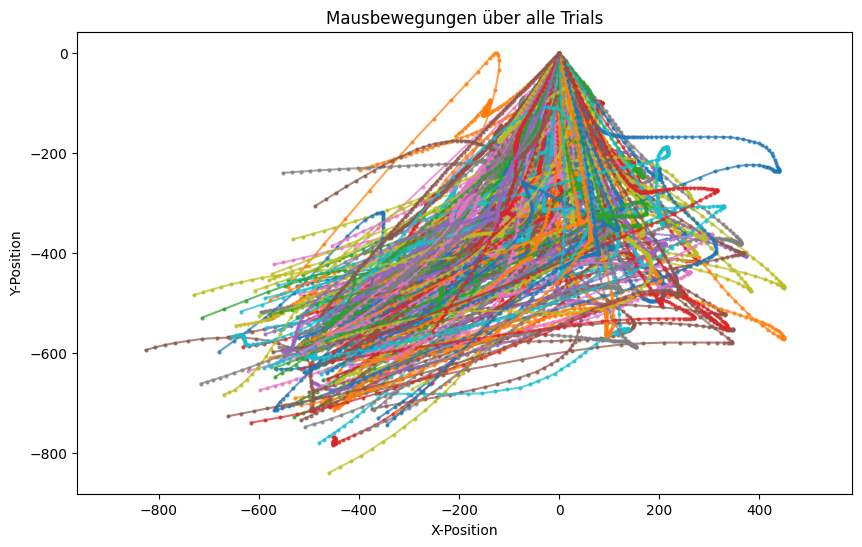

In [ ]:
import matplotlib.pyplot as plt

# Plot initialisieren
plt.figure(figsize=(10, 6))

for trial_x, trial_y in zip(mirrored_df["xpos"], mirrored_df["ypos"]):
    plt.plot(trial_x, trial_y, linestyle='-', marker='o', markersize=2, alpha=0.7)

# Achsen und Titel
plt.xlabel("X-Position")
plt.ylabel("Y-Position")
plt.title("Mausbewegungen über alle Trials")
plt.axis('equal')

plt.show()
